In [6]:
import numpy as npy

import math
#from array import array
from gwpy.timeseries import TimeSeries
from scipy import signal
import matplotlib.pyplot as plt

# Get the input file
filename='noise_10000_corrected.gwf'
TSH = TimeSeries.read(filename, 'Noise_alone')

fs       = 4096 # Sampling frequency
FFTsize  = 50   # FFT lenght in s

# Here we finally have the strain in array format
noise=TSH.data

# Get the PSD from welch method, get median and average
f , Pxx_den_m = signal.welch(TSH.data, fs, nperseg=fs*FFTsize,average='median')
_ , Pxx_den_a = signal.welch(TSH.data, fs, nperseg=fs*FFTsize,average='mean')

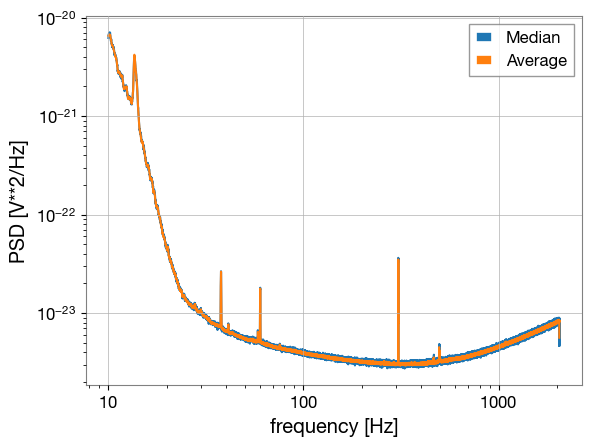

In [7]:
count=0
for i in f:
    if i>10:
        break
    count+=1

plt.loglog(f[count:], Pxx_den_m[count:]**(1/2),label='Median')
plt.loglog(f[count:], Pxx_den_a[count:]**(1/2),label='Average')

plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

plt.legend()
plt.show()

In [13]:
# Finally get the BNS range

pi = npy.acos(-1.)
c = 299792458.
G = 6.6726e-11
Mpc = 3.0856775807e22
Msun = 1.98892e30

m1=1.4
m2=1.4

# /* stop at last stable orbit */
eta = m1*m2/(m1+m2)/(m1+m2)
xLSO = (2.*(-9. - eta + npy.sqrt(1539. - 1008.*eta + 19.*eta*eta)))/(3.*(81. - 57.*eta + eta*eta));
nuLSO = 1./(pi*(m1+m2)*4.92554e-6)*(xLSO**(3./2.))

norm = 5./4.*pi/6.*(npy.pow(G,(5./3.)))/(c**3)*(Msun**(5./3.))/(Mpc**2)*(pi**(-7./3.))
K = m1*m2/(m1+m2)*((m1+m2)**(2./3.))
norm=norm*K

snrMax_a = 0;
snrMax_m = 0;
count=0
nuMin=10.
nuLSO=2048
for i in f:
    count+=1
    if (i < nuMin) or (i > nuLSO):
        continue
    snrMax_a += norm*(i**(-7./3.)) * 1./Pxx_den_a[count-1]
    snrMax_m += norm*(i**(-7./3.)) * 1./Pxx_den_m[count-1]

print(f"BNS range (mean)   = {npy.sqrt(snrMax_a * 4. * (f[1]-f[0]))/(8*2.26):.2f} Mpc")
print(f"BNS range (median) = {npy.sqrt(snrMax_m * 4. * (f[1]-f[0]))/(8*2.26):.2f} Mpc")




BNS range (mean)   = 189.85 Mpc
BNS range (median) = 188.91 Mpc
